## Problem Statement

One of the indian companies selling the old/refurbished cars to the customers, in this case study you have to predict the car price based on the various feature of the cars, there are around 1700+ data points based on that we need to proceed and create the linear regression model. 

**Data Dictionary**

**Company** - Car's company

**Name** - Name of the car model

**Year** - Make year of the car

**Selling Price** -	Selling price of the car (Dependent variable)

**Kilometer driven** -	Total kms driven by the car

**Fuel** -	Cars fuel type

**Seller Type** - Type of the seller

**Transmission** -	If the car is automatic or manual

**Owner** -	Owner type of the car

## Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
    - 2.1 - **[Understand the Data](#read)**
    - 2.2 - **[Exploratory Data Analysis](#eda)**
    - 2.3 - **[Outlier Treatment](#outlier)**
    - 2.4 - **[Missing Value Treatment](#null)**
    - 2.5 - **[Encoding](#enc)**
    - 2.6 - **[Splitting the data into Train and Test](#spl)**
3. **[What is Linear Regression?](#wlr)**
4. **[Measures of Variation](#mv)**
     - 4.1 - **[Sum of Squared Residuals (SSR)](#mv)**
     - 4.2 - **[Sum of Squared Error (SSE)](#mv)**
     - 4.3 - **[Sum of Squared Total (SST)](#mv)**
     - 4.4 - **[Coefficient of Determination (R-Squared)](#mv)**
     - 4.5 - **[Adjusted R Squared](#mv)**
5. **[Understanding Linear Regression with Small example](#toyex)**
     - 5.1 - **[How the Slope and Intercept get calculated](#toyex)**
     - 5.2 - **[How to interprete the Slope and Intercept](#toyex)**
     - 5.3 - **[How to Calculate R-Square and Adjusted R-Square](#toyex)**
6. **[Assumptions of Linear Regression](#assum)**
     - 6.1 - **[No Multicollinearity](#assum)**
     - 6.2 - **[Data should be Linear in Nature](#assum)**
     - 6.3 - **[No Heteroscedasticity](#assum)**
7.  **[Build the MLR Model](#model)** 
     - 7.1 - **[MLR Full Model](#model)**
     - 7.2 - **[MLR Model after Removing Insignificant Variables](#signi_var)**
8. **[Model Evaluation](#eval)**
     - 8.1 - **[R-Squared](#eval)**
     - 8.2 - **[Adjusted R-Squared](#eval)**
     - 8.3 - **[Overall F-Test & p-value of the Model](#eval)**
9. **[Model Performance](#ml_perf)**
     - 9.1 - **[Mean Squared Error (MSE)](#ml_perf)**
     - 9.2 - **[Root Mean Squared Error (RMSE)](#ml_perf)**
     - 9.3 - **[Mean Absolute Error (MAE)](#ml_perf)**
     - 9.4 - **[Mean Absolute Percentage Error (MAPE)](#ml_perf)**

<a id="lib"></a>
# 1. Import Libraries

In [1]:
#Importing the libraries which will be helpful for the data analysis. 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import os 

<a id="prep"></a>
# 2. Data Preparation

In [21]:
# os.chdir(r'C:\Users\rahul\OneDrive\Desktop\Desktop\Case Studies - KWH\Case Study - Linear Regression')
dataset = pd.read_csv(r"C:\Users\mukhe\OneDrive\Desktop\DC(Thurs)\Work\Linear_Regression\Car_Details_Car_Dekho.csv")

<a id="read"></a>
# 2.1. Understand the data

In [22]:
#Here are the few commands which will help us to understand the basic data 
#The info command will help us to understand the different columns present in the dataset and its datatype
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1720 entries, 0 to 1719
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company        1720 non-null   object
 1   name           1720 non-null   object
 2   year           1720 non-null   int64 
 3   selling_price  1720 non-null   int64 
 4   km_driven      1720 non-null   int64 
 5   fuel           1720 non-null   object
 6   seller_type    1720 non-null   object
 7   transmission   1720 non-null   object
 8   owner          1720 non-null   object
dtypes: int64(3), object(6)
memory usage: 121.1+ KB


In [23]:
#Len command will help us understand the total number of records present in the dataset
len(dataset)

1720

In [258]:
#.columns command will help us understand the columns present in the dataset
dataset.columns

Index(['Company', 'name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner'],
      dtype='object')

In [259]:
#The below command will help us understand the total number of columns present in the dataset
len(dataset.columns)

9

# <a id="eda"></a>
# 2.2. Exploratory Data Analysis

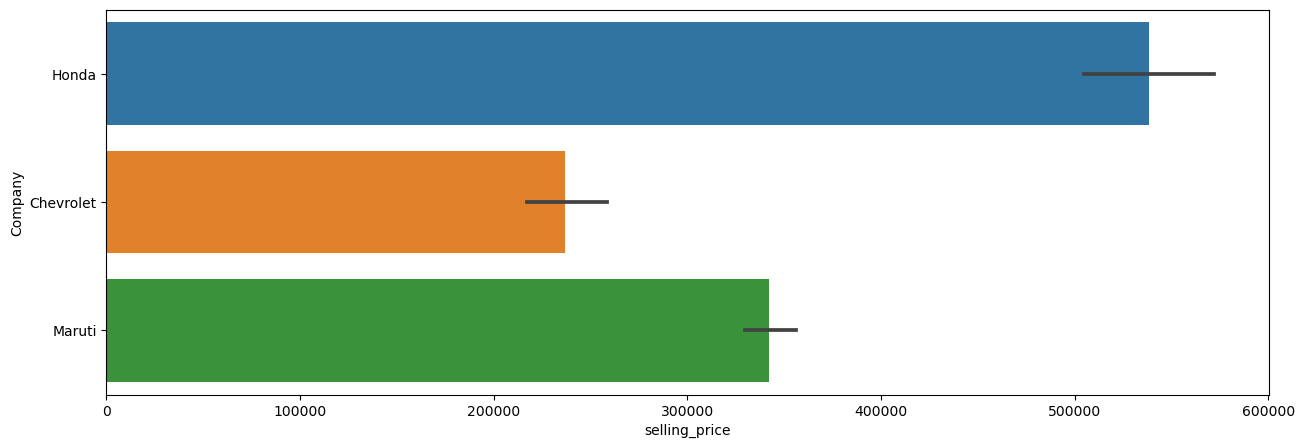

In [260]:
plt.figure(figsize=(15,5))
sns.barplot(data=dataset, y = 'Company',x='selling_price')
plt.show()

**Honda Cars are having overall higher selling price**

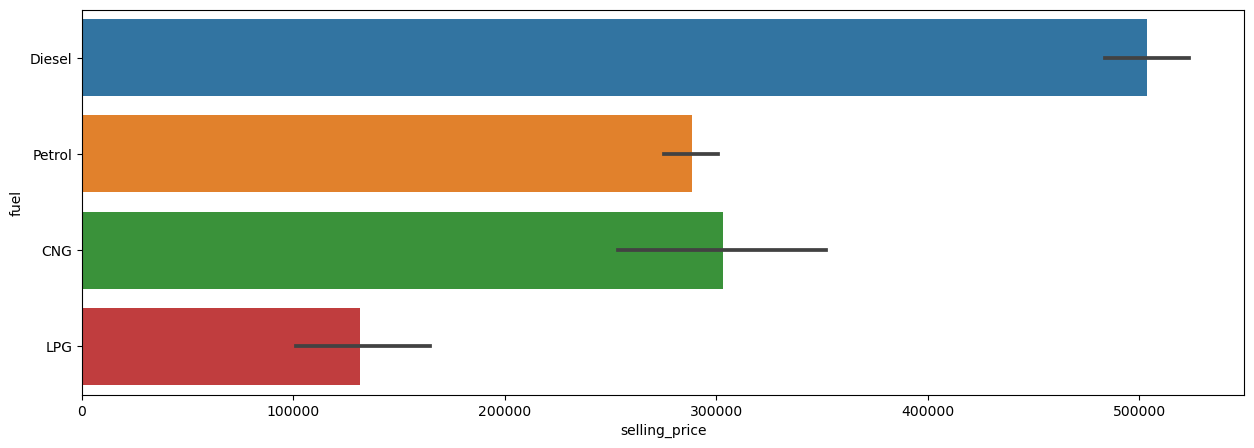

In [261]:
plt.figure(figsize=(15,5))
sns.barplot(data=dataset, y = 'fuel',x='selling_price')
plt.show()

**Diesel cars are having higher selling price**

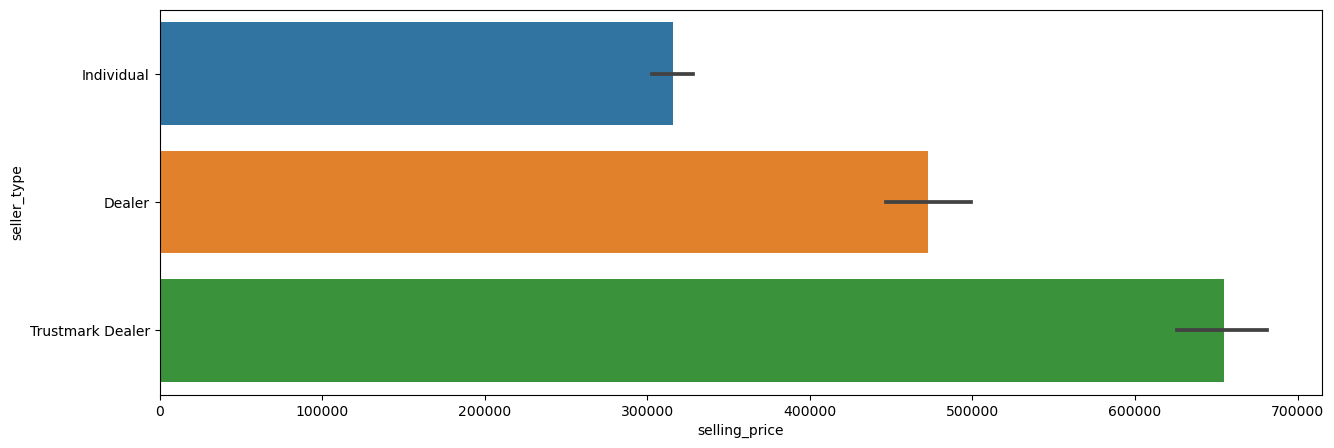

In [262]:
plt.figure(figsize=(15,5))
sns.barplot(data=dataset, y = 'seller_type',x='selling_price')
plt.show()

**Trustmark dealers are having higher selling price**

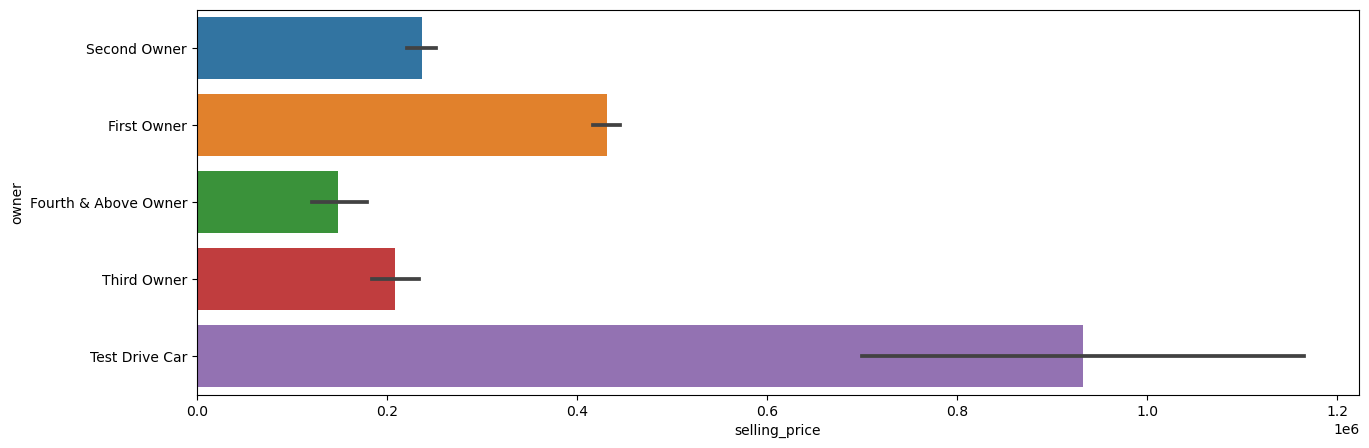

In [263]:
plt.figure(figsize=(15,5))
sns.barplot(data=dataset, y = 'owner',x='selling_price')
plt.show()

**Test Drive cars are having higher price**

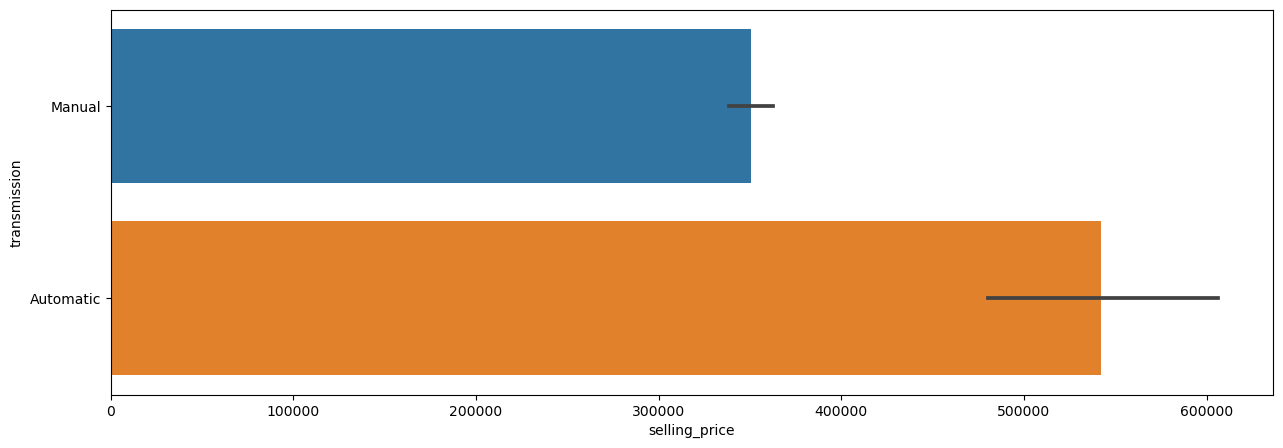

In [264]:
plt.figure(figsize=(15,5))
sns.barplot(data=dataset, y = 'transmission',x='selling_price')
plt.show()

**Automatic Cars are having higher selling price**

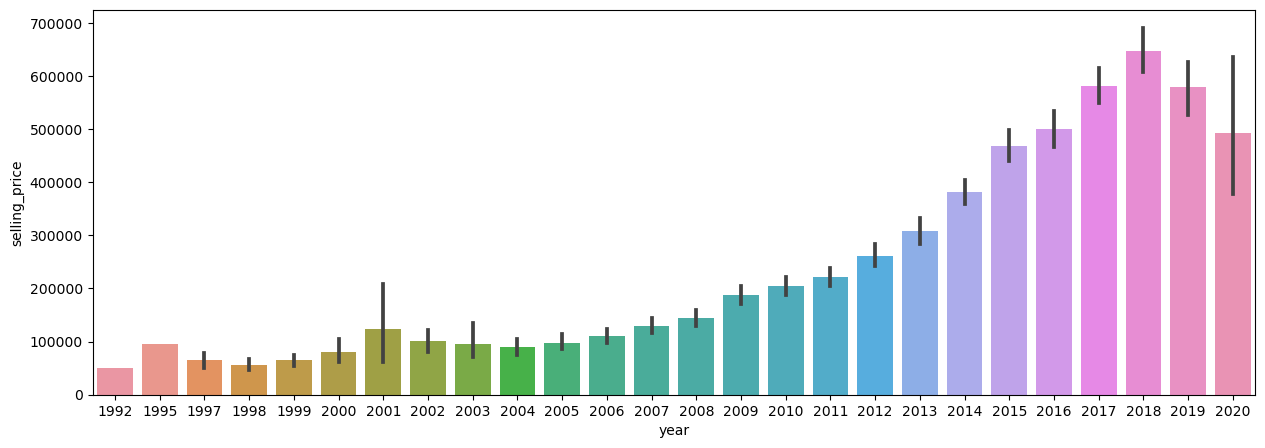

In [265]:
plt.figure(figsize=(15,5))
sns.barplot(data=dataset, x = 'year',y='selling_price')
plt.show()

**Newer the car is, higher the selling price it will have**

<Figure size 1500x500 with 0 Axes>

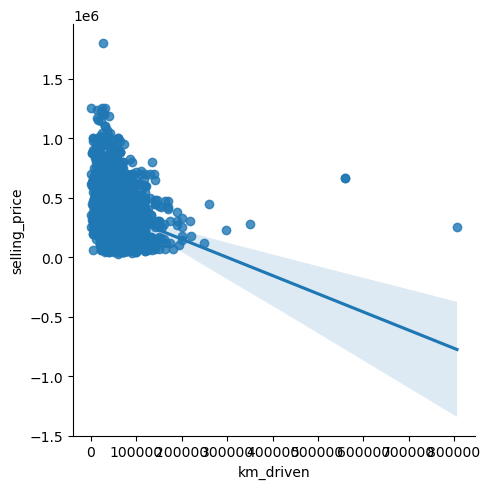

In [5]:
# Alternatively you can use REGPLOT

plt.figure(figsize=(15,5))
sns.lmplot(data=dataset, x = 'km_driven',y='selling_price')
# sns.regplot(data=dataset, x = 'km_driven',y='selling_price')
plt.show()

**If the Kilometer driven are lesser more the price is**

<a id="outlier"></a>
# 2.3. Outlier Treatment

In [26]:
#Outlier Treatment
col=dataset.select_dtypes(exclude='object').columns
Q1 = dataset[col].quantile(0.25)
Q3 = dataset[col].quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[~((dataset[col] < (Q1 - 1.5*IQR))| (dataset[col] > (Q3 + 1.5*IQR))).any(axis=1)]

In [28]:
len(dataset)

1632

<a id="null"></a>
# 2.4. Missing Value Treatment

In [29]:
#Checking the count of the missing values percentage, there are very few missing values there in the dataset
dataset.isnull().sum()/len(dataset)*100

Company          0.0
name             0.0
year             0.0
selling_price    0.0
km_driven        0.0
fuel             0.0
seller_type      0.0
transmission     0.0
owner            0.0
dtype: float64

**In this dataset there are no missing values so we are good to proceed to the next steps.**

# <a id="enc"></a>
# 2.5. Encoding

In [30]:
col=dataset.select_dtypes('object').columns

for i in col:
    dataset[i] = dataset[i].astype('category')
    dataset[i] = dataset[i].cat.codes

In [18]:
dataset

Company  name  year  selling_price  km_driven  fuel  seller_type  \
0           1    83  2014       450000.0   141000.0     1            1   
1           1    83  2014       450000.0   141000.0     1            1   
2           1   117  2018       930000.0    14500.0     3            0   
3           1   124  2014       560000.0    74000.0     1            1   
4           1   125  2014       675000.0    90000.0     1            0   
...       ...   ...   ...            ...        ...   ...          ...   
1714        2   204  2006        75000.0   130000.0     3            1   
1715        2   168  2014       195000.0    75000.0     3            1   
1716        2   182  2015       155000.0    40000.0     3            1   
1718        2   315  2012       225000.0    90000.0     1            1   
1719        2   170  2009       110000.0    83000.0     3            1   

      transmission  owner  
0                1      2  
1                1      2  
2                1      0  
3                1      2  
4                1      0  
...            ...    ...  
1714             1      0  
1715             1      2  
1716             1      0  
1718             1      2  
1719             1      2  

[1686 rows x 9 columns]

<a id="spl"></a>
# 2.6. Splitting the data into Train and Test

In [43]:
x = dataset.iloc[:,[0,2,4,5,6,7,8]].values

In [44]:
y=dataset.iloc[:,3].values

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [49]:
from sklearn.linear_model import LinearRegression

# Fitting the model
regressor_ini = LinearRegression().fit(x_train, y_train) # Getting the candidate model

# Testing the model
y_pred=regressor_ini.predict(x_test)

# Checking the accuracy score
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)  # As the accuracy score is not meeting the desired accuracy, so this model is not fit to be deployed

0.5853469027782278

<a id="model"></a>
# 7. Building the MLR Model

In [52]:
import statsmodels.api as sm
x_train=sm.add_constant(x_train)
x_test=sm.add_constant(x_test)
result=sm.OLS(y_train,x_train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     225.6
Date:                Fri, 21 Jun 2024   Prob (F-statistic):          9.80e-210
Time:                        18:45:19   Log-Likelihood:                -15223.
No. Observations:                1142   AIC:                         3.046e+04
Df Residuals:                    1134   BIC:                         3.050e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.992e+07   2.73e+06    -21.987      0.000   -6.53e+07   -5.46e+07
x1          1.675e+04   6773.519      2.472      0.014    3456.730       3e+04
x2          3.008e+04   1348.240     22.308      0.000    2.74e+04    3.27e+04
x3            -0.8303      0.170     -4.882      0.000      -1.164      -0.497
x4         -7.039e+04   5053.848    -13.928      0.000   -8.03e+04   -6.05e+04
x5         -3929.2568   1.01e+04     -0.388      0.698   -2.38e+04    1.59e+04
x6         -7.277e+04   2.05e+04     -3.548      0.000   -1.13e+05   -3.25e+04
x7         -1.183e+04   4276.957     -2.766      0.006   -2.02e+04   -3437.596
==============================================================================
Omnibus:                       35.994   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.162
Skew:                           0.418   Prob(JB):                     3.13e-09
Kurtosis:                       3.355   Cond. No.                     4.21e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.21e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<a id="signi_var"></a>
# 7.2 MLR Model after Removing Insignificant Variables

As the P value is more that 0.05 we wil remove the feature **X5**, P values helps us to understand if the variable is significant or not

The test hypothesis for P value for variables is given as:
<p style='text-indent:25em'> <strong> H<sub>o</sub>: All β's are equal to zero </strong> (i.e. regression model is not significant) </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>: At least one β is not equal to zero </strong> (i.e. regression model is significant) </p>

If the P-value is coming out more than 0.05 we reject the variable as it is insignificant, however if the varibles are having P-value less than 0.05 than the variable is considered as the significant variable


In [53]:
x = dataset.iloc[:,[0,2,4,5,7,8]].values
y = dataset.iloc[:,3].values

In [59]:
from sklearn.model_selection import train_test_split
x_train_t,x_test_t,y_train_t,y_test_t = train_test_split(x,y,test_size=0.3)

x_train_t=sm.add_constant(x_train_t)
x_test_t=sm.add_constant(x_test_t)

In [60]:
regressor_tuned = sm.OLS(y_train_t,x_train_t).fit()

In [61]:
y_pred_tuned = regressor_tuned.predict(x_test_t)

In [62]:
regressor_tuned.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     267.1
Date:                Fri, 21 Jun 2024   Prob (F-statistic):          5.83e-213
Time:                        18:49:28   Log-Likelihood:                -15206.
No. Observations:                1142   AIC:                         3.043e+04
Df Residuals:                    1135   BIC:                         3.046e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.645e+07    2.7e+06    -20.885      0.000   -6.18e+07   -5.12e+07
x1           2.54e+04   6362.011      3.993      0.000    1.29e+04    3.79e+04
x2          2.837e+04   1337.427     21.210      0.000    2.57e+04     3.1e+04
x3            -0.8927      0.168     -5.320      0.000      -1.222      -0.563
x4         -7.269e+04   4862.035    -14.950      0.000   -8.22e+04   -6.31e+04
x5         -1.101e+05   2.24e+04     -4.928      0.000   -1.54e+05   -6.63e+04
x6         -1.287e+04   4154.292     -3.097      0.002    -2.1e+04   -4716.869
==============================================================================
Omnibus:                       57.469   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.951
Skew:                           0.506   Prob(JB):                     6.46e-16
Kurtosis:                       3.668   Cond. No.                     4.20e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
regressor_tuned=LinearRegression().fit(x_train_t,y_train_t)
y_pred_t=regressor_tuned.predict(x_test_t)

**AIC/BIC** Lower the AIC/BIC Values better the model fit is. There is no specific threshold to the values but overall in our model it is looking good. 

**Skewness and Kurtosis** The residual errors are positively skewed with a skewness of 0.268 and also have an excess kurtosis of 3.352 i.e. Thicker Tails

**Normality tests based on Skewness and Kurtosis**

While Skewness and Kurtosis quantify the amount of departure from normality, one would want to know if the departure is statistically significant. The following two tests let us do just that:

The Omnibus K-squared test

The Jarque–Bera test

In both tests, we start with the following hypotheses:

Null hypothesis (H_0): The data is normally distributed.

Alternate hypothesis (H_1): The data is not normally distributed, in other words, the departure from normality, as measured by the test statistic, is statistically significant.

**The Omnibus test and the JB test have both produced test-statistics (54.671 and 61.619 respectively), which lie outside the H_0 acceptance zone of the Chi-squared. Thus we will reject the Null hypothesis H_0, i.e. the residuals are not normally distributed.**

**Durbin Watson Test** It is a test to check the autocorrelation and the ideal value we can expect is between 1.5 to 2.50. In our example the value is **1.994** which is good and proves there is no autocolleration. Also, we can see in the below autocorrelation function chart it is looking good. 

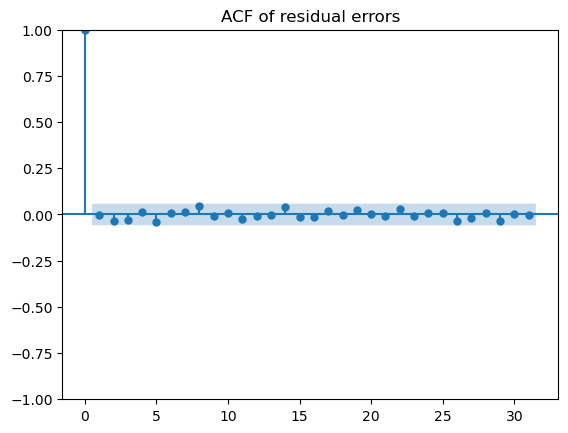

In [298]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(regressor_ini.resid, title='ACF of residual errors')
plt.show()

**Condition Number** Higher the value or we can say more that 30 means there is a multicolinearity. In our example, the value is very high. There is a multicolinearity in the dataset. 

<a id="ml_perf"></a>
# 9. Model Performance

In [66]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error,mean_squared_error

MAPE=mean_absolute_percentage_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))

In [67]:
regression_ini = {'MODEL NAME':['Regression_Ini'],'MAPE':[MAPE],'MAE':[MAE],'MSE':[MSE], 'RMSE':[RMSE]}

In [68]:
regression_ini

{'MODEL NAME': ['Regression_Ini'],
 'MAPE': [0.45449253455813526],
 'MAE': [111516.43845608486],
 'MSE': [21291145125.10312],
 'RMSE': [145914.85573821166]}

In [72]:
MAPE1=mean_absolute_percentage_error(y_test_t,y_pred_t)
MAE1=mean_absolute_error(y_test_t,y_pred_t)
MSE1=mean_squared_error(y_test_t,y_pred_t)
RMSE1=np.sqrt(mean_squared_error(y_test_t,y_pred_t))

regression_tuned = {'MODEL NAME':['Regression_Tuned'],'MAPE':[MAPE1],'MAE':[MAE1],'MSE':[MSE1], 'RMSE':[RMSE1]}

In [73]:
Final_Result = pd.concat([pd.DataFrame(regression_ini),pd.DataFrame(regression_tuned)])

In [74]:
Final_Result

MODEL NAME      MAPE            MAE           MSE           RMSE
0    Regression_Ini  0.454493  111516.438456  2.129115e+10  145914.855738
0  Regression_Tuned  0.430542  114838.169916  2.276319e+10  150874.751111

**Overall there is a good increase in the R2 and Adjusted R2 values in the tuned model and there is a decrease in the MAE, MSE and RMSE. This is behaviour is good.**